In [1]:
import os, sys, inspect, io

cmd_folder = os.path.realpath(
    os.path.dirname(
        os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0])))

if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

from transitions.extensions.states import Timeout, Tags, add_state_features
from transitions.extensions.factory import HierarchicalGraphMachine as Machine
from IPython.display import Image, display, display_png

@add_state_features(Timeout, Tags)
class CustomStateMachine(Machine):
    pass

class Matter(object):
    def do_x(self):
        pass
    def do_y(self):
        pass
    def do_z(self):
        pass
    def is_hot(self):
        return True
    def is_too_hot(self):
        return False
    def show_graph(self, **kwargs):
        stream = io.BytesIO()
        self.get_graph(**kwargs).draw(stream, prog='dot', format='png')
        display(Image(stream.getvalue()))

extra_args = dict(auto_transitions=False, initial='standing', title='Mood Matrix',
                  show_conditions=True, show_state_attributes=True)

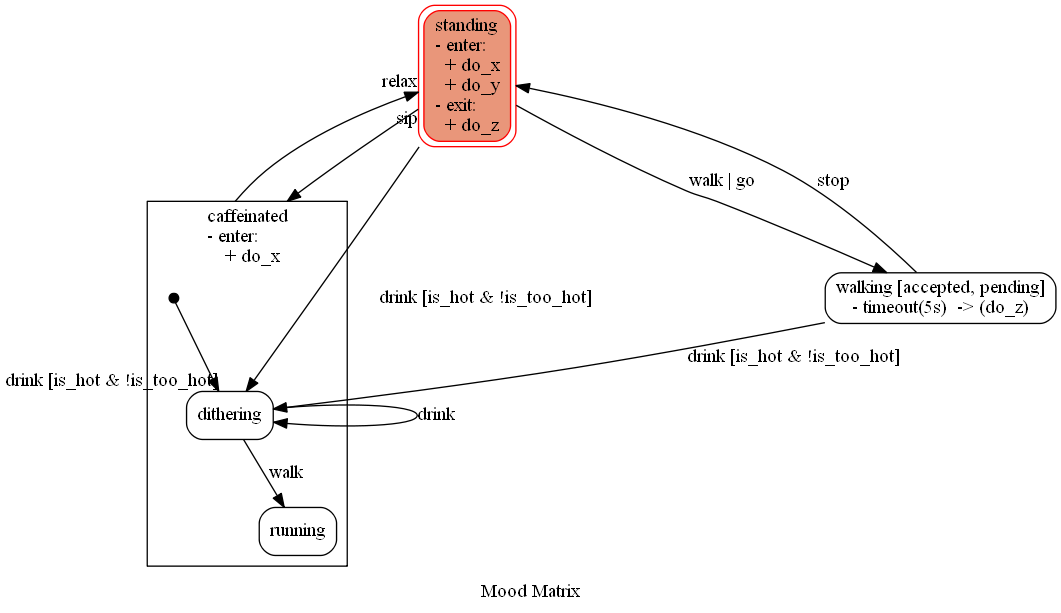

In [2]:
states = [{'name': 'caffeinated', 'on_enter': 'do_x',
           'children':['dithering', 'running'], 'transitions': [['drink', 'dithering', '=']]},
          {'name': 'standing', 'on_enter': ['do_x', 'do_y'], 'on_exit': 'do_z'},
          {'name': 'walking', 'tags': ['accepted', 'pending'], 'timeout': 5, 'on_timeout': 'do_z'},
          
         ]
transitions = [
  ['walk', 'standing', 'walking'],
  ['go', 'standing', 'walking'],
  ['stop', 'walking', 'standing'],
  {'trigger': 'drink', 'source': '*', 'dest': 'caffeinated_dithering',
   'conditions':'is_hot', 'unless': 'is_too_hot'},
  ['walk', 'caffeinated_dithering', 'caffeinated_running'],
  ['relax', 'caffeinated', 'standing'],
  ['sip', 'standing', 'caffeinated']
]

model = Matter()
machine = CustomStateMachine(model=model, states=states, transitions=transitions, **extra_args)
model.show_graph()

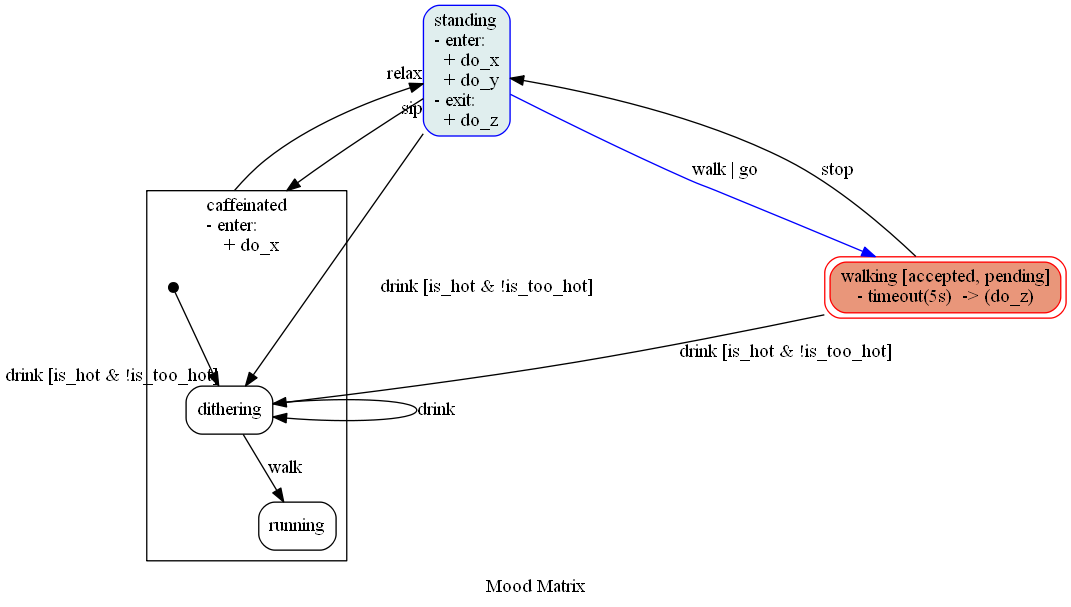

In [3]:
model.walk()
model.show_graph()

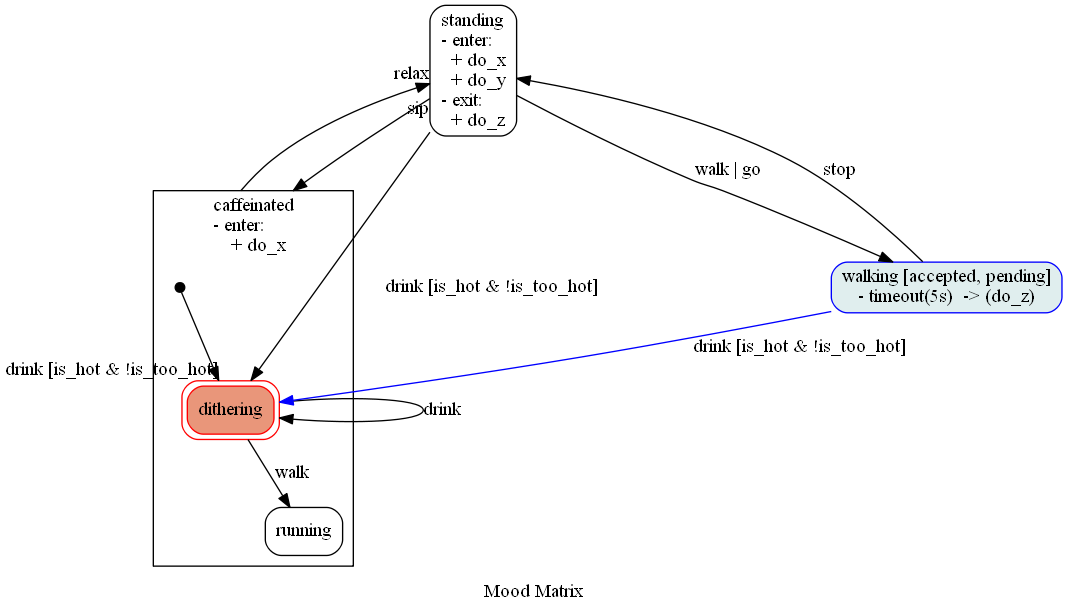

In [4]:
model.drink()
model.show_graph()

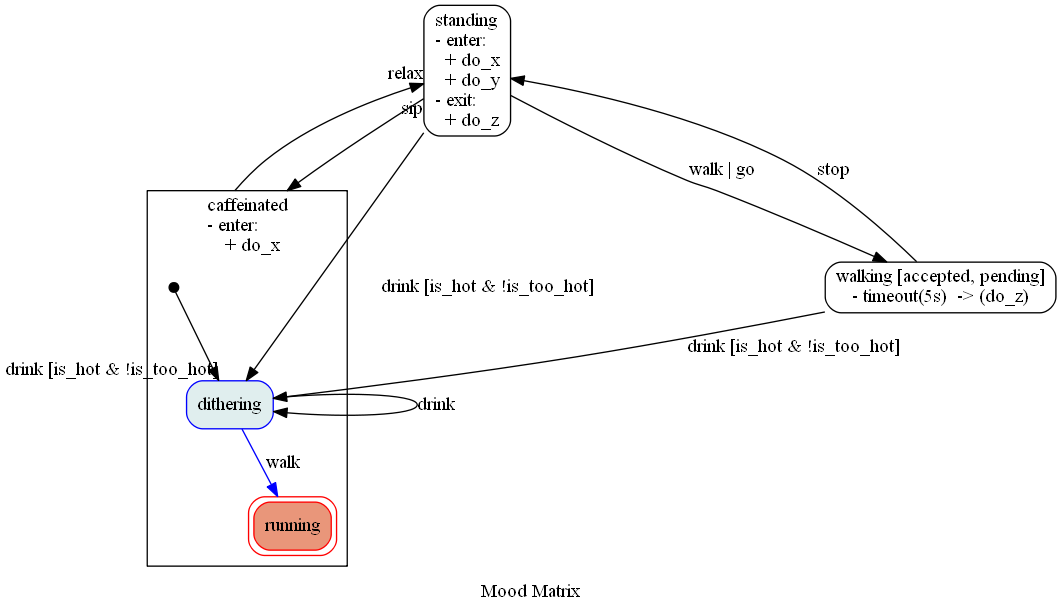

In [5]:
model.walk()
model.show_graph()

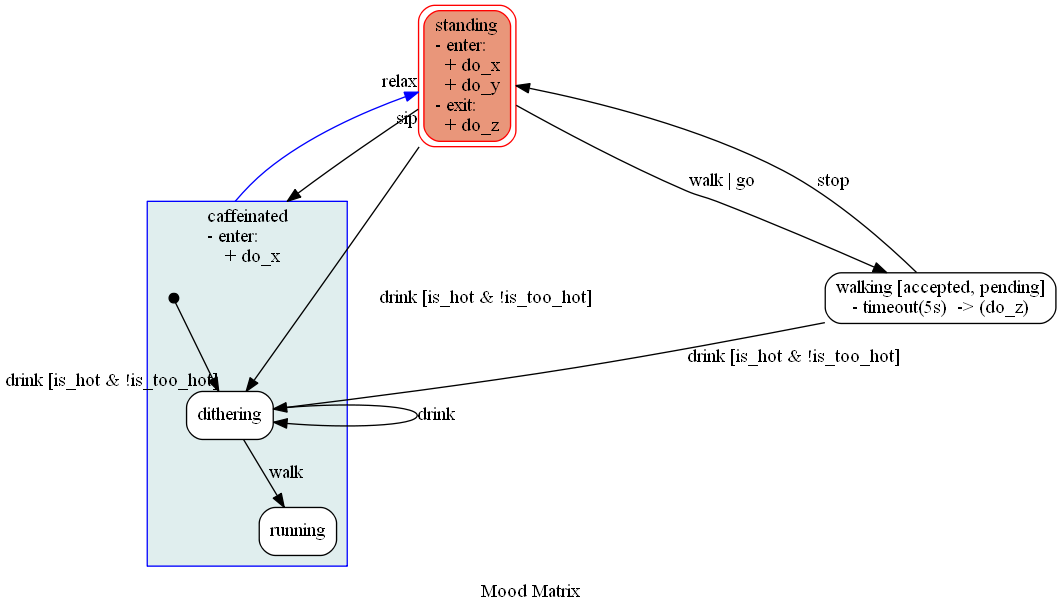

In [6]:
model.relax()
model.show_graph()

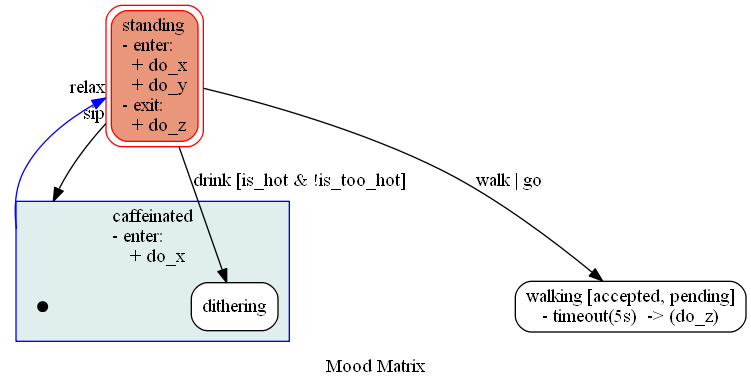

In [7]:
model.show_graph(show_roi=True)

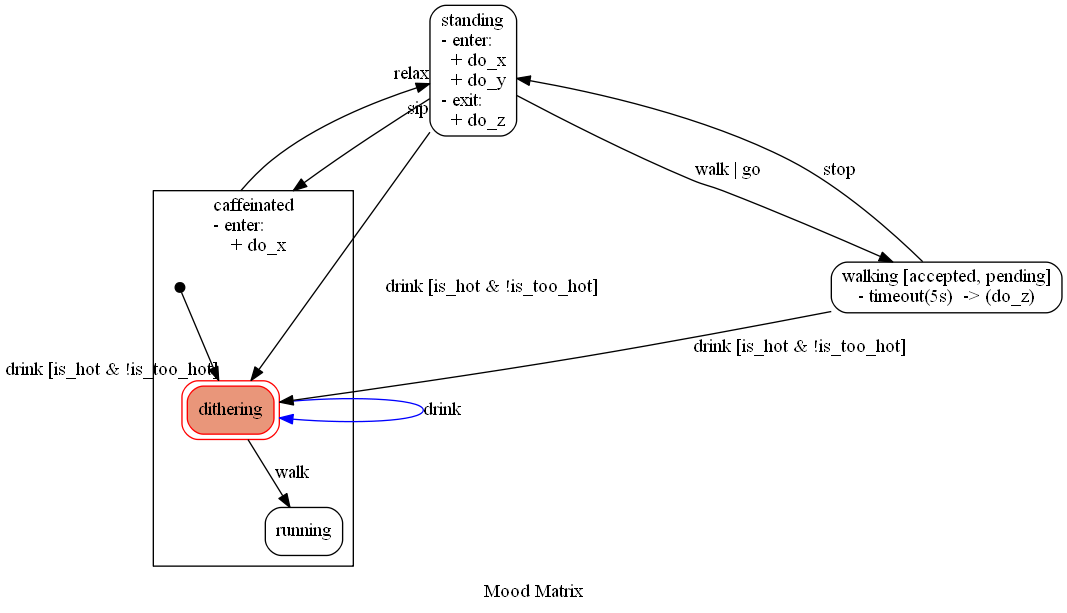

In [8]:
# multimodel test
model1 = Matter()
model2 = Matter()
machine = CustomStateMachine(model=[model1, model2], states=states, transitions=transitions, **extra_args)
model1.drink()
model1.drink()
model2.walk()
model1.show_graph()